In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [2]:
df = pd.read_csv("D:\Machine learning\Heart Failure Prediction\Dataset\heart.csv")

In [3]:
df.head(10) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [21]:
df.shape

(918, 12)

In [19]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
df.index

RangeIndex(start=0, stop=918, step=1)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Label encode the categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [41]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape[0])


number of duplicate rows: 0


In [27]:
## to check the data types in a dataset 
df.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

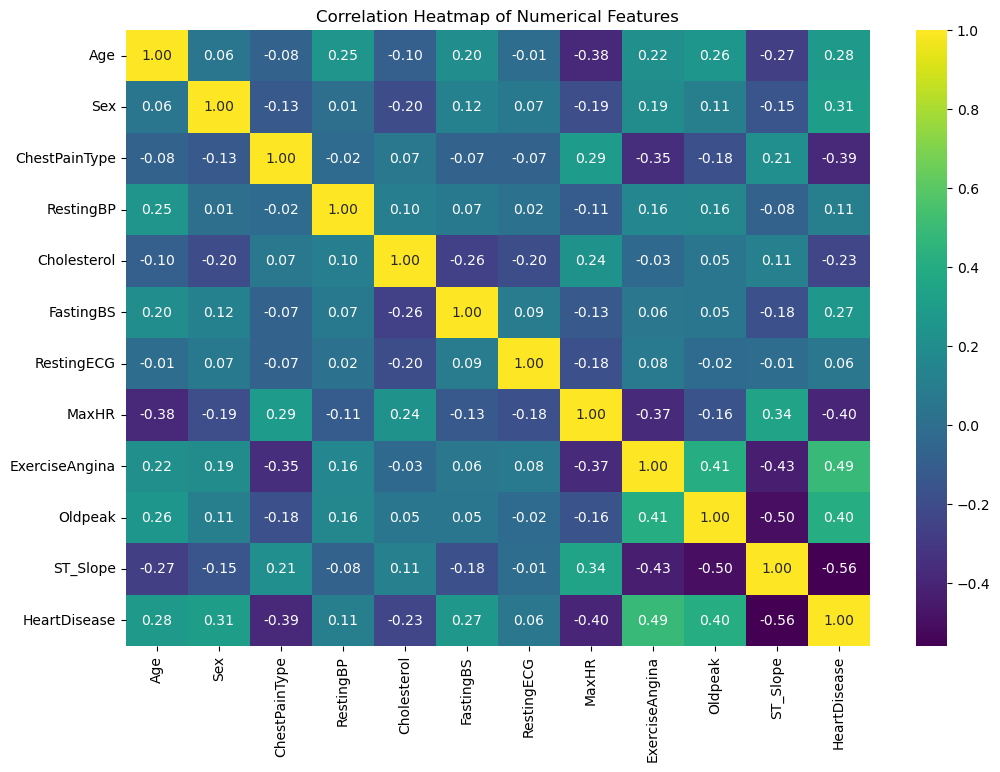

In [29]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f")

# Set the title of the plot
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.show()


In [28]:
df.Age.value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [30]:
df.index

RangeIndex(start=0, stop=918, step=1)

In [ ]:
# to plot the top 3 values only
plt.pie(age_count[:3], labels=Ages[:3])

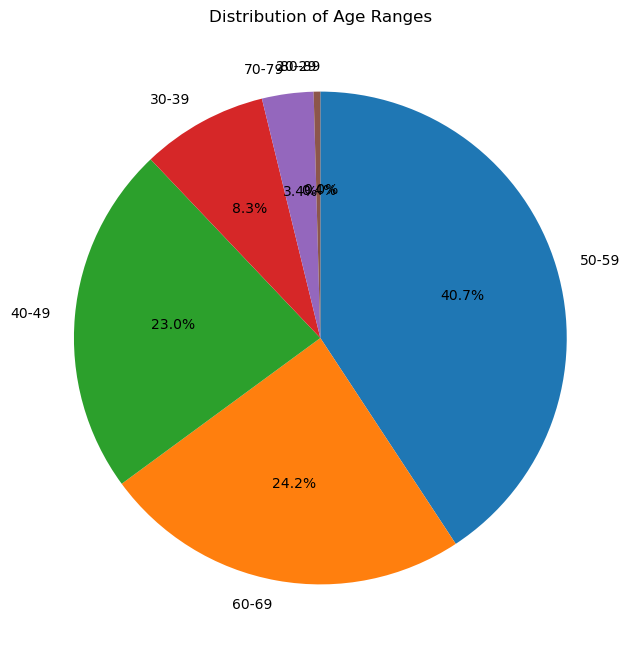

In [37]:
import matplotlib.pyplot as plt

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create 'AgeRange' column using pd.cut
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of each age range
age_range_counts = df['AgeRange'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Age Ranges')
plt.show()


In [82]:
df = df.drop('AgeRange', axis=1)


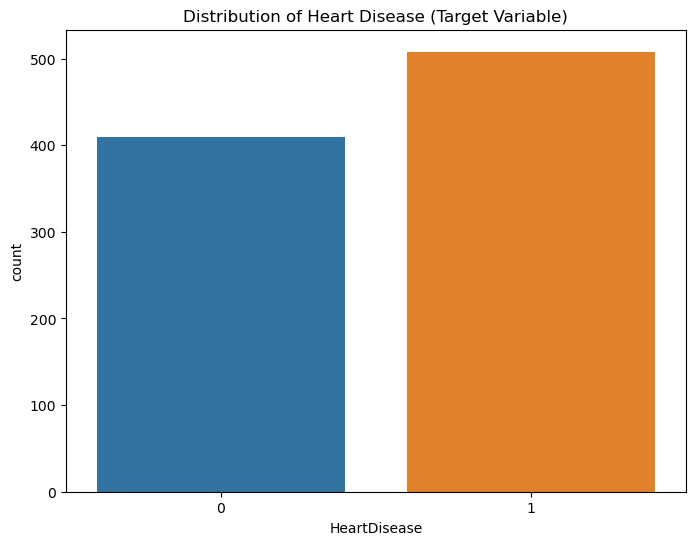

In [83]:
# Visualize the distribution of the target variable (HeartDisease)
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.show()

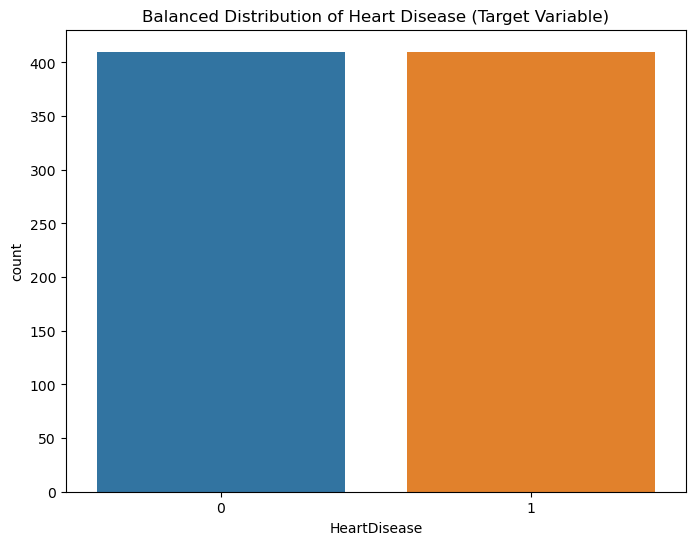

In [116]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['HeartDisease'] == 0]
minority_class = df[df['HeartDisease'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Visualize the balanced distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=balanced_df)
plt.title('Balanced Distribution of Heart Disease (Target Variable)')
plt.show()

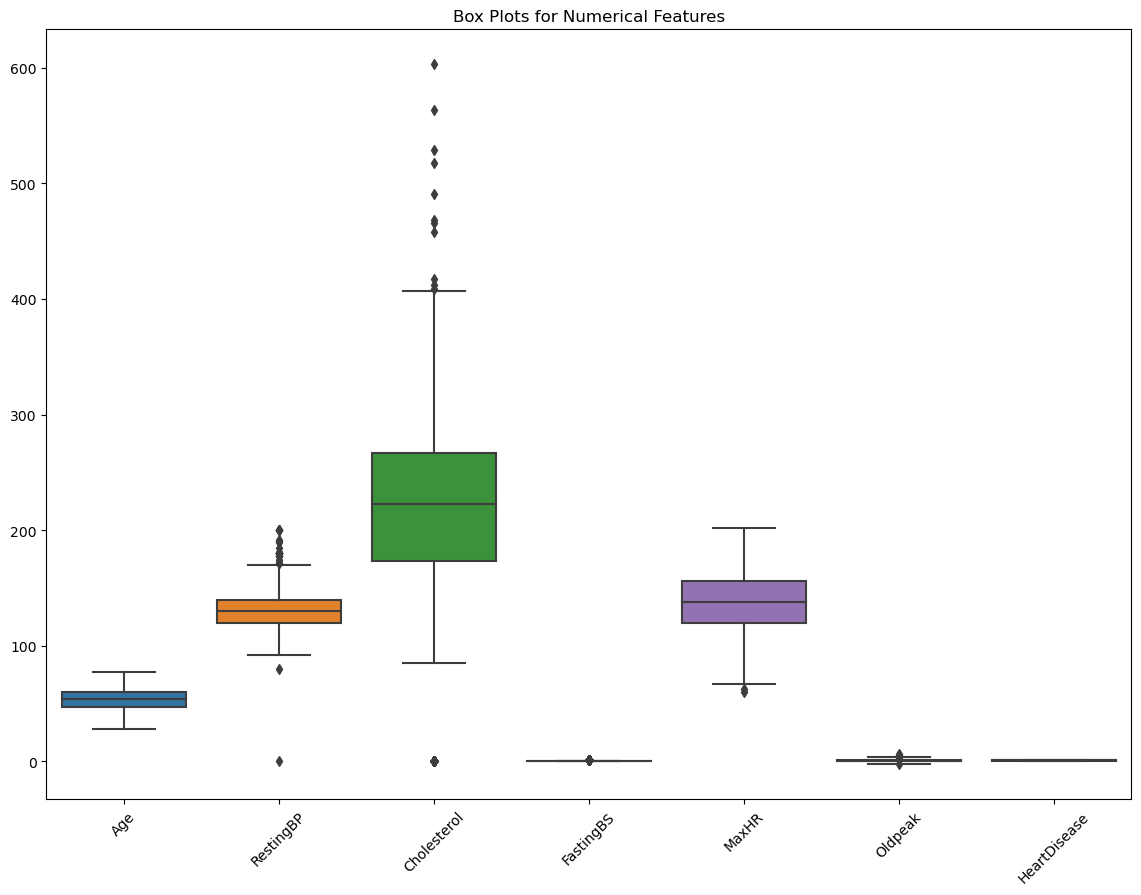

In [85]:
# Create box plots for numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1))
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.show()

Shape before removing outliers: (918, 12)
Shape after removing outliers: (701, 12)


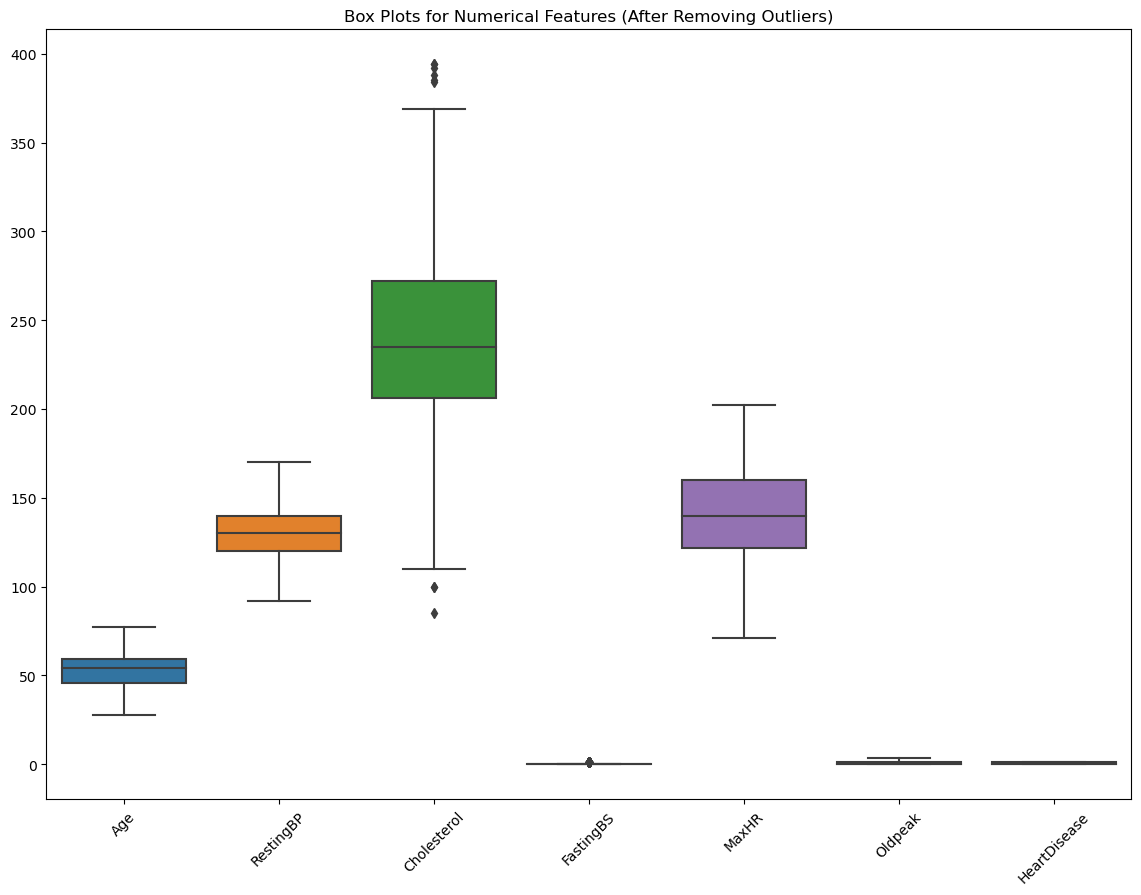

In [86]:
# Define a function to remove outliers using the modified IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# List of numerical columns to consider for outlier removal
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Remove outliers from numerical columns
df_no_outliers = remove_outliers(df, numerical_columns)

# Display the shape before and after removing outliers
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

# Create box plots for numerical features after removing outliers
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_no_outliers.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1))
plt.title('Box Plots for Numerical Features (After Removing Outliers)')
plt.xticks(rotation=45)
plt.show()


In [87]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [88]:
df.groupby(['HeartDisease'])

In [89]:
df.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

In [90]:

df.groupby(['ST_Slope','HeartDisease']).size()
# 0 down
# 1 flat
# 2 up

ST_Slope  HeartDisease
0         0                14
          1                49
1         0                79
          1               381
2         0               317
          1                78
dtype: int64

In [91]:
# convert this into dataframe
df.groupby(['ST_Slope','HeartDisease']).size().reset_index()


,ST_Slope,HeartDisease,0
0,0,0,14
1,0,1,49
2,1,0,79
3,1,1,381
4,2,0,317
5,2,1,78


In [93]:
df.groupby(['ExerciseAngina','ST_Slope','HeartDisease']).size().reset_index().rename(columns={0:'Disease_Count'})

,ExerciseAngina,ST_Slope,HeartDisease,Disease_Count
0,0,0,0,11
1,0,0,1,11
2,0,1,0,53
3,0,1,1,135
4,0,2,0,291
5,0,2,1,46
6,1,0,0,3
7,1,0,1,38
8,1,1,0,26
9,1,1,1,246


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation (let's use k=5 for example)
k_fold = 5
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='accuracy')

# Display the cross-validation scores
print(f"Cross-Validation Scores (Accuracy) for {k_fold}-fold Cross-Validation:")
print(cross_val_scores)

# Calculate the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"\nMean Accuracy: {mean_accuracy}")


Cross-Validation Scores (Accuracy) for 5-fold Cross-Validation:
[0.875      0.83695652 0.82608696 0.81967213 0.75409836]

Mean Accuracy: 0.8223627940128295


In [94]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (734, 11)
Shape of X_test: (184, 11)
Shape of y_train: (734,)
Shape of y_test: (184,)


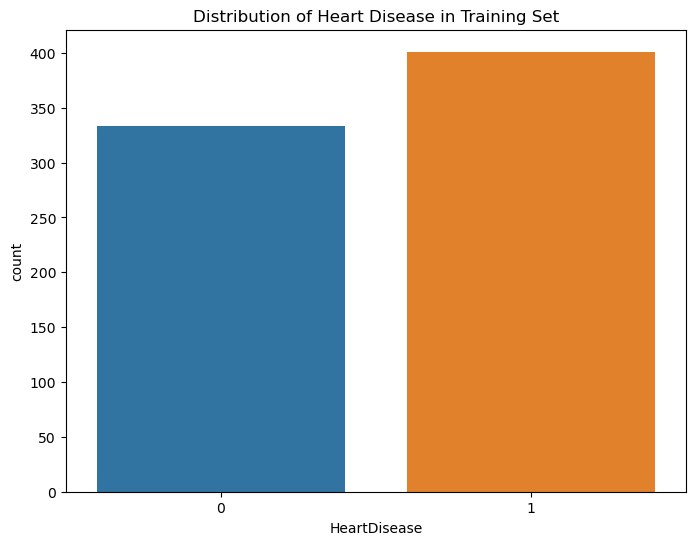

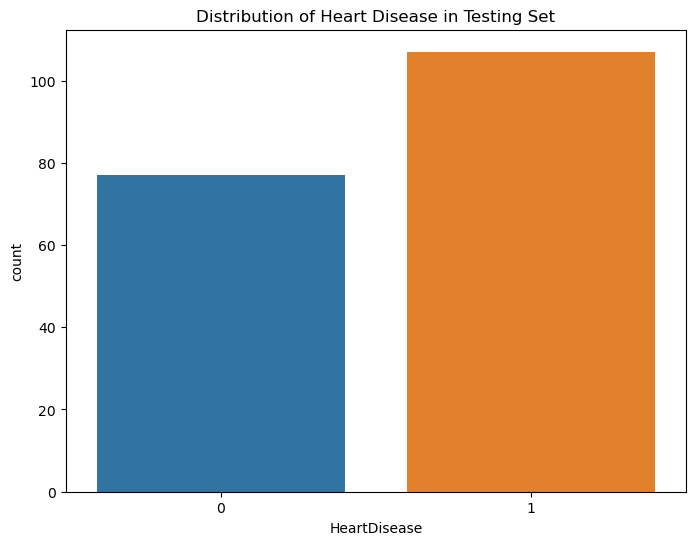

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=pd.DataFrame({'HeartDisease': y_train}))
plt.title('Distribution of Heart Disease in Training Set')
plt.show()

# Visualize the distribution of the target variable in the testing set
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=pd.DataFrame({'HeartDisease': y_test}))
plt.title('Distribution of Heart Disease in Testing Set')
plt.show()

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
logreg_predictions = logreg_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.842391304347826


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
svm_predictions = svm_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.6847826086956522


In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Initialize the K-Means model with the number of clusters (assuming 2 classes)
kmeans_model = KMeans(n_clusters=2, random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train)

# Make predictions on the testing data
kmeans_predictions = kmeans_model.predict(X_test)

# Assuming K-Means results in cluster assignments, convert them to binary values (0 or 1)
kmeans_predictions_binary = [0 if x == 0 else 1 for x in kmeans_predictions]

# Calculate accuracy
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions_binary)

print("K-Means Accuracy:", kmeans_accuracy)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Accuracy: 0.5760869565217391


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.7010869565217391


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8804347826086957


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
gb_predictions = gb_classifier.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)

print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.875


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
dt_predictions = dt_classifier.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.782608695652174


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


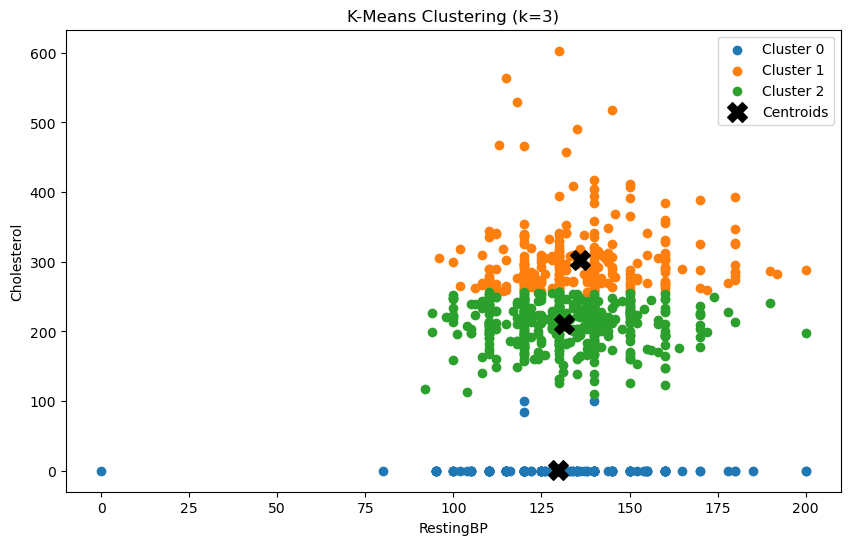

In [103]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features_for_clustering = ['RestingBP', 'Cholesterol']

# Extract the selected features
X_cluster = X[features_for_clustering]

# Initialize the KMeans model with the desired number of clusters (let's say 3 for this example)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X_cluster)

# Add cluster labels to the original dataset
X['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter(cluster_data[features_for_clustering[0]], cluster_data[features_for_clustering[1]], label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')

plt.xlabel(features_for_clustering[0])
plt.ylabel(features_for_clustering[1])
plt.title(f'K-Means Clustering (k={num_clusters})')
plt.legend()
plt.show()


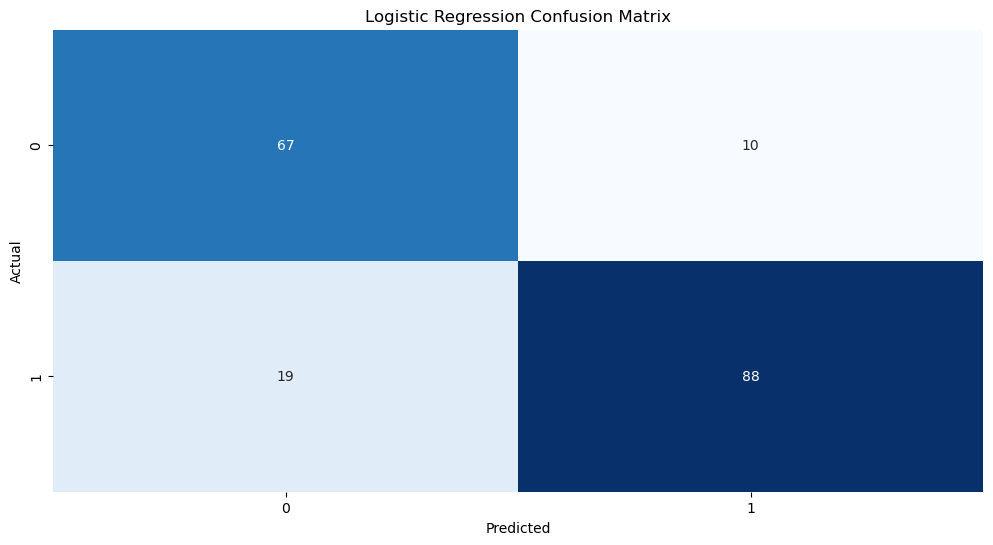

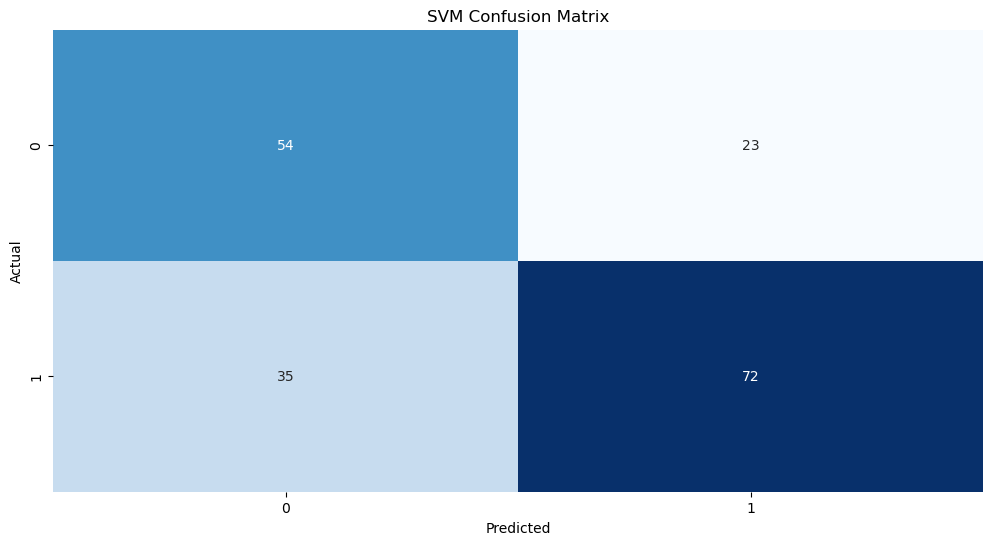

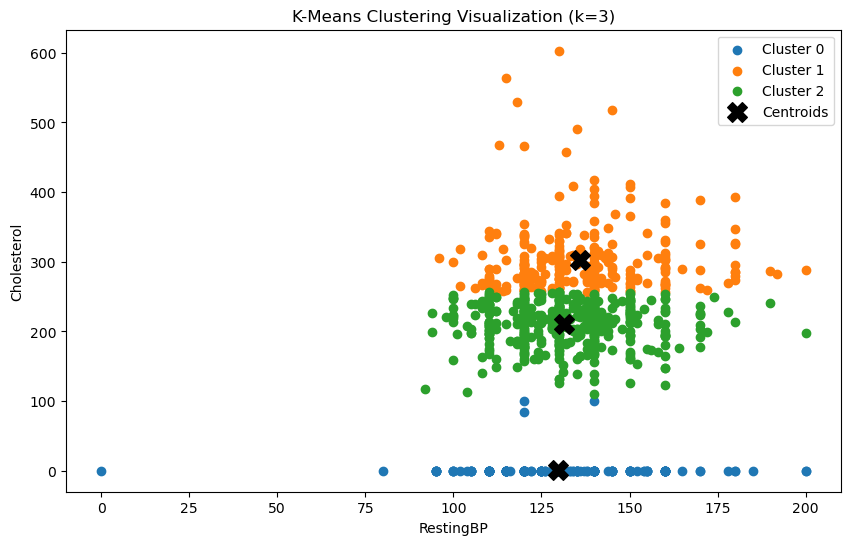

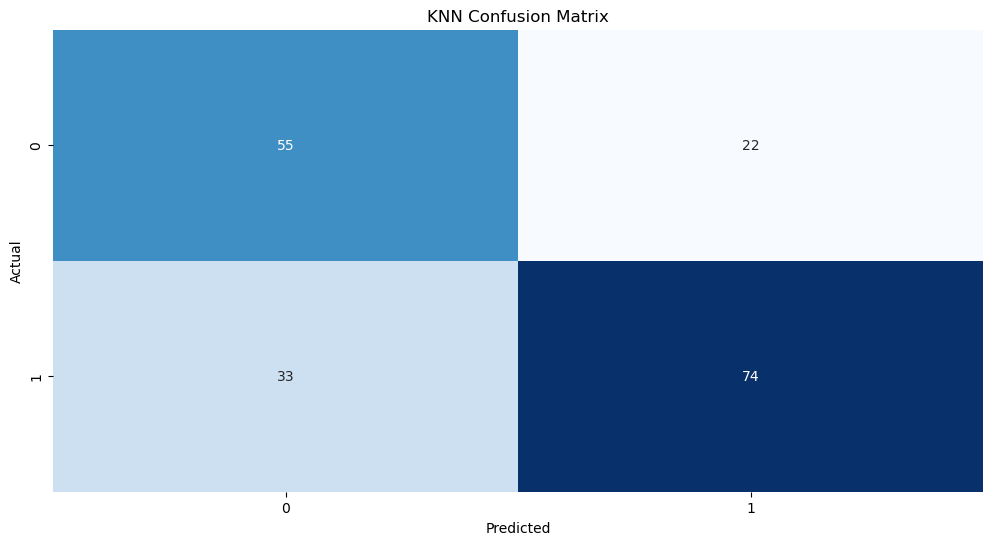

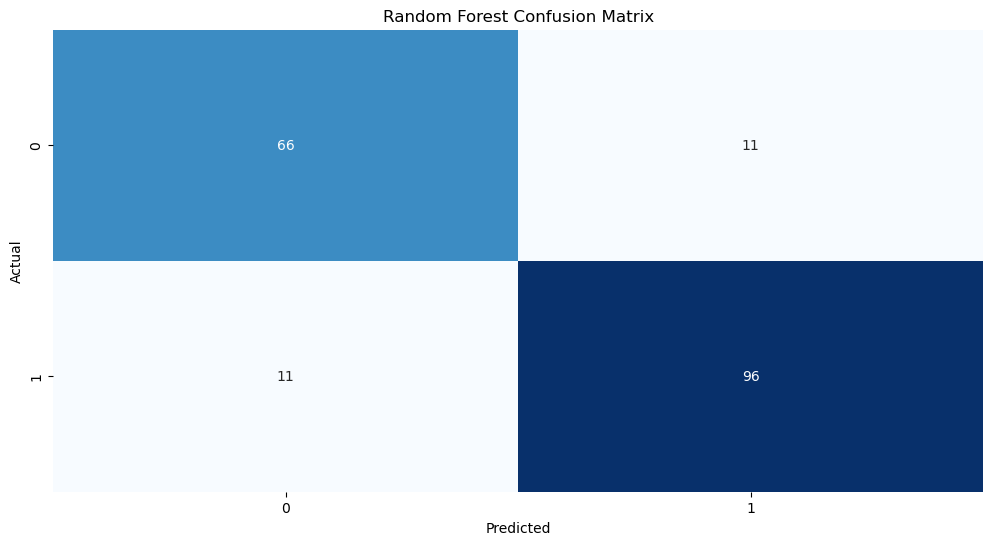

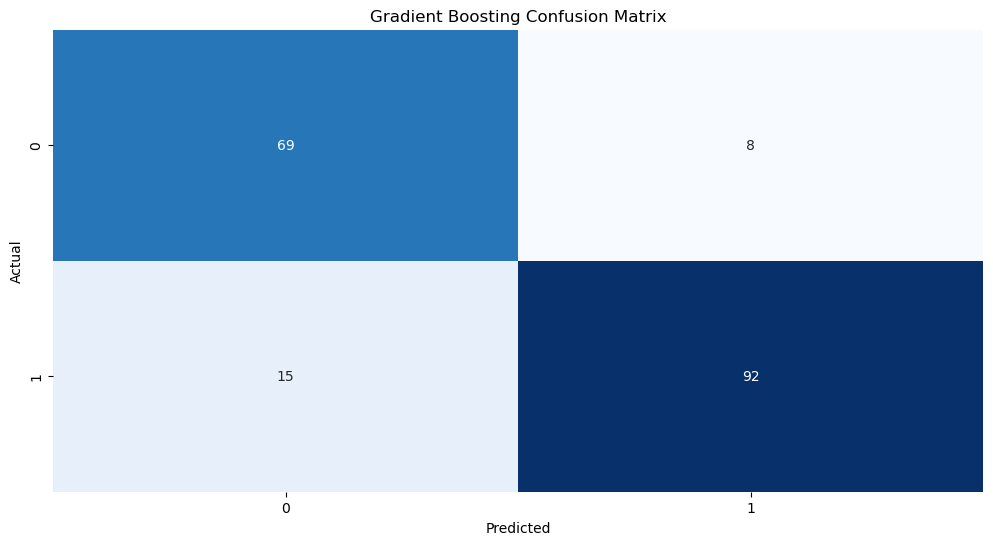

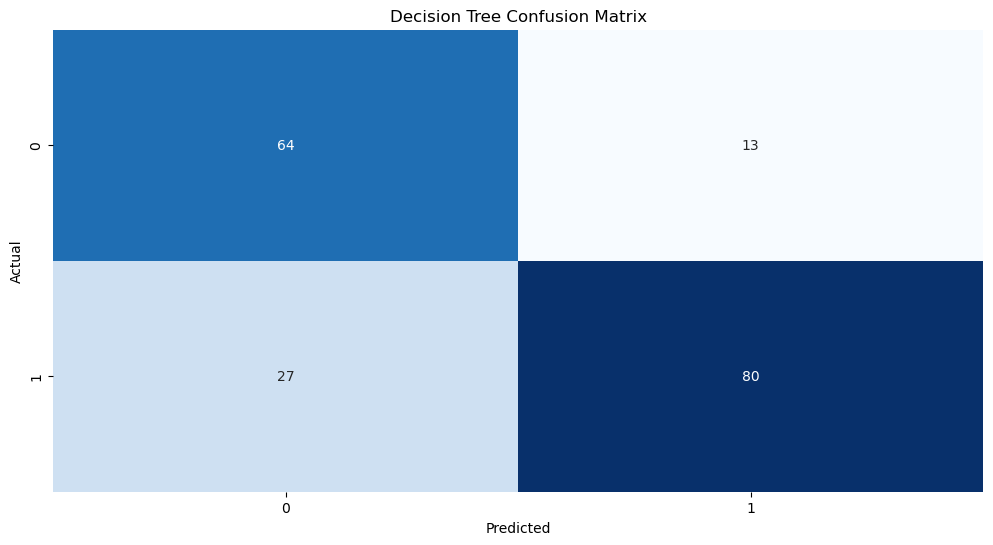

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster

# Helper function to display a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_predictions)
plot_confusion_matrix(y_test, logreg_predictions, 'Logistic Regression Confusion Matrix')

# SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(y_test, svm_predictions, 'SVM Confusion Matrix')

# K-Means Clustering
# Note: We can't use confusion matrix directly for clustering as we don't have true labels
# Instead, we can visualize the clustering results
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter(cluster_data[features_for_clustering[0]], cluster_data[features_for_clustering[1]], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.xlabel(features_for_clustering[0])
plt.ylabel(features_for_clustering[1])
plt.title(f'K-Means Clustering Visualization (k={num_clusters})')
plt.legend()
plt.show()

# KNN
knn_cm = confusion_matrix(y_test, knn_predictions)
plot_confusion_matrix(y_test, knn_predictions, 'KNN Confusion Matrix')

# Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')

# Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_predictions)
plot_confusion_matrix(y_test, gb_predictions, 'Gradient Boosting Confusion Matrix')

# Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree Confusion Matrix')

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
logreg_precision = precision_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)

print("Logistic Regression Precision:", logreg_precision)
print("Logistic Regression Recall:", logreg_recall)
print("Logistic Regression F1 Score:", logreg_f1)

# SVM
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

# K-Means Clustering (Since it's unsupervised, precision, recall, and F1 are not applicable)
kmeans_precision = None
kmeans_recall = None
kmeans_f1 = None

# KNN
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1 Score:", knn_f1)

# Random Forest
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

# Gradient Boosting
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print("Gradient Boosting Precision:", gb_precision)
print("Gradient Boosting Recall:", gb_recall)
print("Gradient Boosting F1 Score:", gb_f1)

# Decision Tree
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)

# K-Means Clustering (Performance metrics not applicable for clustering)
kmeans_precision = None
kmeans_recall = None
kmeans_f1 = None


Logistic Regression Precision: 0.8979591836734694
Logistic Regression Recall: 0.822429906542056
Logistic Regression F1 Score: 0.8585365853658536
SVM Precision: 0.7578947368421053
SVM Recall: 0.6728971962616822
SVM F1 Score: 0.712871287128713
KNN Precision: 0.7708333333333334
KNN Recall: 0.6915887850467289
KNN F1 Score: 0.7290640394088671
Random Forest Precision: 0.897196261682243
Random Forest Recall: 0.897196261682243
Random Forest F1 Score: 0.897196261682243
Gradient Boosting Precision: 0.92
Gradient Boosting Recall: 0.8598130841121495
Gradient Boosting F1 Score: 0.888888888888889
Decision Tree Precision: 0.8602150537634409
Decision Tree Recall: 0.7476635514018691
Decision Tree F1 Score: 0.7999999999999999


In [108]:
import pandas as pd

# Define the data
data = {
    'Algorithm': ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'K-Means Clustering'],
    'Precision': [logreg_precision, svm_precision, knn_precision, rf_precision, gb_precision, dt_precision, kmeans_precision],
    'Recall': [logreg_recall, svm_recall, knn_recall, rf_recall, gb_recall, dt_recall, kmeans_recall],
    'F1 Score': [logreg_f1, svm_f1, knn_f1, rf_f1, gb_f1, dt_f1, kmeans_f1]
}

# Create a DataFrame
performance_df = pd.DataFrame(data)

# Print the DataFrame
print(performance_df)


             Algorithm  Precision    Recall  F1 Score
0  Logistic Regression   0.897959  0.822430  0.858537
1                  SVM   0.757895  0.672897  0.712871
2                  KNN   0.770833  0.691589  0.729064
3        Random Forest   0.897196  0.897196  0.897196
4    Gradient Boosting   0.920000  0.859813  0.888889
5        Decision Tree   0.860215  0.747664  0.800000
6   K-Means Clustering        NaN       NaN       NaN
